In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='Credit', src=FILE, fpath='./hce_data/credit/credit.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.00833582878112793] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "LIMIT_BAL": "numeric",
    "SEX": "numeric",
    "EDUCATION": "numeric",
    "MARRIAGE": "numeric",
    "AGE": "numeric",
    "PAY_0": "numeric",
    "PAY_2": "numeric",
    "PAY_3": "numeric",
    "PAY_4": "numeric",
    "PAY_5": "numeric",
    "PAY_6": "numeric",
    "BILL_AMT1": "numeric",
    "BILL_AMT2": "numeric",
    "BILL_AMT3": "numeric",
    "BILL_AMT4": "numeric",
    "BILL_AMT5": "numeric",
    "BILL_AMT6": "numeric",
    "PAY_AMT1": "numeric",
    "PAY_AMT2": "numeric",
    "PAY_AMT3": "numeric",
    "PAY_AMT4": "numeric",
    "PAY_AMT5": "numeric",
    "PAY_AMT6": "numeric",
    "payment": "numeric"
}
INFO:profiler.data.dataset

In [4]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.11355710029602051] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 1 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 1, and the bound is 0.00056618
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 24/24 [00:00<00:00, 35.05it/s]
INFO:profiler.data.transformer:Number of training samples: 720000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[4.383524656295776] Create Training Data execution time: 4.269967555999756



In [5]:
# set sparsity to 0 for exp_reproduce
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[4.388683319091797] Learn Structure start

INFO:profiler.learner:use threshold 1.2101
INFO:profiler.utility:[5.1330718994140625] Learn Structure execution time: 0.7443885803222656



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[5.139067649841309] Get Dependencies start



BILL_AMT3 -> BILL_AMT2 (0.005447411551711073)
BILL_AMT3,BILL_AMT2 -> BILL_AMT4 (0.007777766982293765)
BILL_AMT3,BILL_AMT2,BILL_AMT4 -> BILL_AMT5 (0.009393058795653511)
BILL_AMT3,BILL_AMT2,BILL_AMT4,BILL_AMT5 -> BILL_AMT6 (0.01207828671238893)
BILL_AMT3,BILL_AMT2,BILL_AMT4,BILL_AMT5,BILL_AMT6 -> PAY_AMT1 (0.028399193039772123)
BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1 -> PAY_AMT2 (0.02790101600897665)
BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2 -> PAY_AMT3 (0.03231907432846012)
BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3 -> PAY_AMT4 (0.036749210457572484)
BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4 -> PAY_AMT5 (0.03692209778975875)


INFO:profiler.utility:[5.532531499862671] Get Dependencies execution time: 0.3934638500213623



BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5 -> PAY_AMT6 (0.04899869650975764)
BILL_AMT3,BILL_AMT2,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2 -> BILL_AMT1 (0.00359997495051181)
BILL_AMT3,BILL_AMT2,BILL_AMT4,BILL_AMT5,BILL_AMT1 -> PAY_4 (0.2334472371251324)
BILL_AMT4,BILL_AMT5,PAY_4 -> PAY_5 (0.14911914752327082)
BILL_AMT5,PAY_5 -> PAY_6 (0.1453468225087613)
BILL_AMT2,BILL_AMT1,PAY_4 -> PAY_2 (0.18832231081323206)
BILL_AMT2,PAY_4,PAY_2 -> PAY_3 (0.10673922990776169)
BILL_AMT1,PAY_2 -> PAY_0 (0.10270033469160605)


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


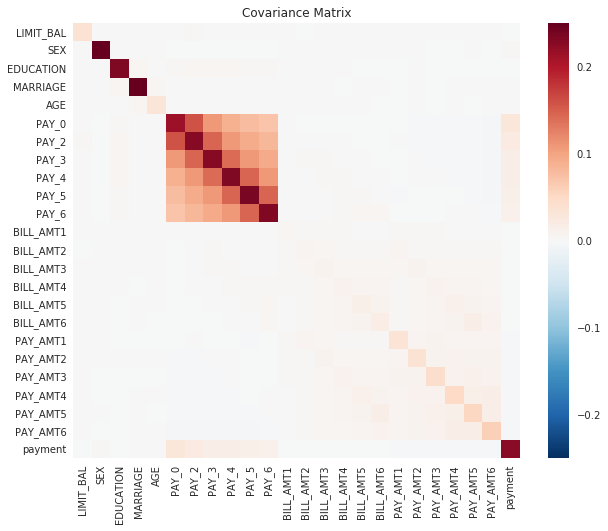

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


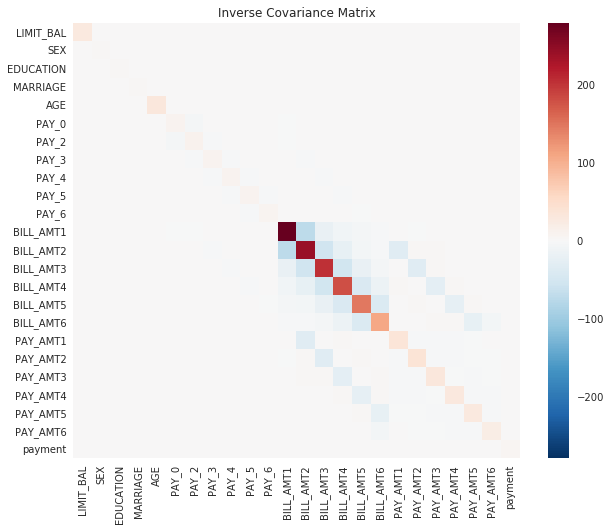

threshold =  48
sum =  [  0.           0.           0.           0.           0.
   9.42248081  12.03201328  10.31534276   9.51885371   9.58599917
   5.82760301 116.22178383 206.08324036 201.6002317  187.63803469
 153.65893363 111.16237319  50.96034821  58.24691494  53.07122259
  47.51886109  43.28400408  16.88529641   0.        ]
attr =  Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'payment'],
      dtype='object')
Attr w/o dependency: 
 Index([['LIMIT_BAL'], ['SEX'], ['EDUCATION'], ['MARRIAGE'], ['AGE'], ['PAY_0'],
       ['PAY_2'], ['PAY_3'], ['PAY_4'], ['PAY_5'], ['PAY_6'], ['PAY_AMT4'],
       ['PAY_AMT5'], ['PAY_AMT6'], ['payment']],
      dtype='object')


Attr w/ dependency: 
 Index([['BILL_AMT1'], ['BILL_AMT2'], ['BILL_AMT3'], ['BILL_AMT4'],


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


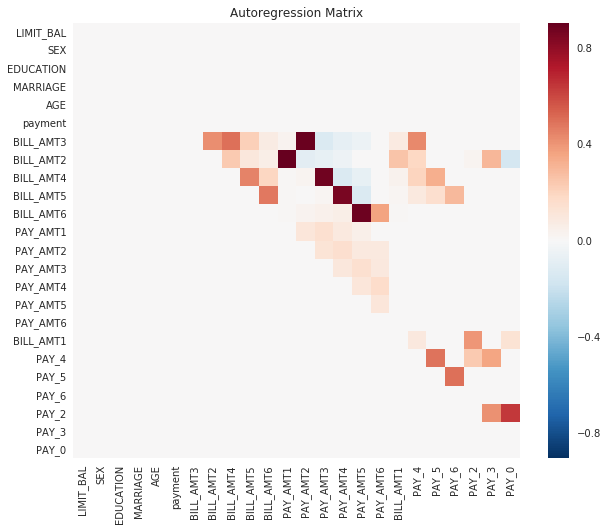

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.008336,start: Load Data,0.000000
1,0.108526,end: Load Data,0.100190
2,0.113557,start: Create Training Data,0.000000
3,4.383525,end: Create Training Data,4.269968
4,4.388683,start: Learn Structure,0.000000
5,5.133072,end: Learn Structure,0.744389
6,5.139068,start: Get Dependencies,0.000000
7,5.532531,end: Get Dependencies,0.393464
8,5.532531,total_execution_time,5.508010


In [11]:
pf.session.timer.to_csv()